# Testing of our point control sim

We'll make a basic simulator control loop (what the BRAIN trainer will do), and plot the output. Then we'll be able to use the same tools to visualize the learned policies.

In [1]:
%matplotlib inline

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import math
import random

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

In [4]:
from bonsai_ai import Simulator, Config, Brain

In [5]:
import move_a_point_sim as sim

In [6]:
def run_sim_episode(sim, policy):
    """
    Given a sim and a policy, step through some iterations 
    of the simulator, returning the history of states.
    
    Args:
        sim: a PointSimulator
        policy: a function (SimState -> action dictionary)
    """
    k = 0 # Count steps, break out of infinite loops
    state_history = []
    reward_history = []
    state = sim.episode_start()
    state_history.append(state)

    is_terminal = False
    
    while not is_terminal:
        action = policy(state)
        # convert to a [-1,1] action
        #action['direction_radians'] = action['direction_radians'] / math.pi - 1.0
        (state, reward, is_terminal) = sim.simulate(action)
        state_history.append(state)
        reward_history.append(reward)
        k += 1
        if k > 1000:
            raise Exception("Simulation ran longer than 1000 steps. Stopping.")

    return state_history, reward_history

In [7]:
# Some silly policies
def random_policy(state):
    """
    Ignore the state, move randomly.
    """
    return {'direction_radians': random.random() * 2 * math.pi}

def go_up_policy(state):
    return {'direction_radians': math.pi / 2.0}

In [8]:
config = Config()
brain = Brain(config, "directControlHistory")
point_sim = sim.PointBonsaiBridge(brain, "move_a_point_sim")

states, rewards = run_sim_episode(point_sim, random_policy)

In [9]:
states[0]

{'dx': -0.5879577513573184, 'dy': -0.1473544898565987}

In [10]:
def plot_state_history(states):
    target = states[0]['dx'], states[0]['dy']
    
    xs = [target[0] - s['dx'] for s in states]
    ys = [target[1] - s['dy'] for s in states]

    fig, axes = plt.subplots(1,1)
    #data = np.random.random([10, 2]) 
    
    # Pull out colors
    colors = np.linspace(0.1, 1, len(states))
    mymap = plt.get_cmap("Blues")
    # get the colors from the color map
    my_colors = mymap(colors)
    axes.scatter(xs, ys, s=40,
                     c=colors, edgecolors='None',
                     cmap=mymap)
    
    # Plot the target point in orange
    axes.scatter(target[0], target[1], s=40, c='orange', edgecolors='None')
    
    def bounds(lst):
        eps = 0.05
        return min(lst+[0])-eps, max(lst+[1])+eps
        
    axes.set_xlim(bounds(xs + [target[0]]))
    axes.set_ylim(bounds(ys + [target[1]]))
    

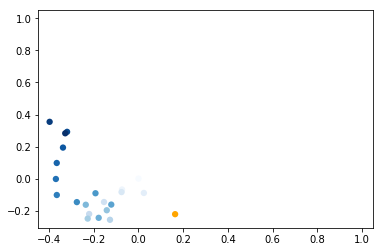

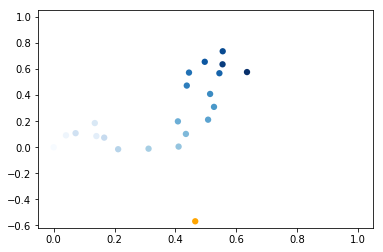

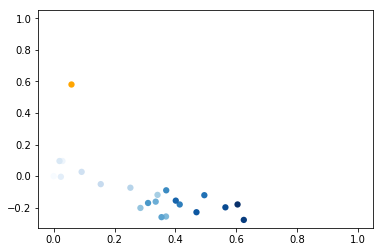

In [11]:
for i in range(3):
    states, rewards = run_sim_episode(point_sim, random_policy)
    plot_state_history(states)

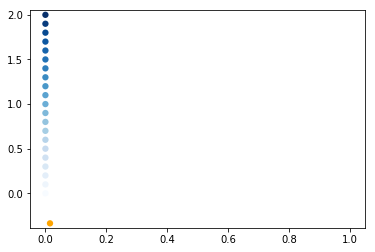

In [12]:
# Let's try the "go up" policy:
states, rewards = run_sim_episode(point_sim, go_up_policy)
plot_state_history(states)

In [13]:
states

[{'dx': 0.015056255720826472, 'dy': -0.33637290123401054},
 {'dx': 0.015056255720826472, 'dy': -0.4363729012340105},
 {'dx': 0.015056255720826472, 'dy': -0.5363729012340105},
 {'dx': 0.015056255720826472, 'dy': -0.6363729012340106},
 {'dx': 0.015056255720826472, 'dy': -0.7363729012340107},
 {'dx': 0.015056255720826472, 'dy': -0.8363729012340108},
 {'dx': 0.015056255720826472, 'dy': -0.9363729012340108},
 {'dx': 0.015056255720826472, 'dy': -1.036372901234011},
 {'dx': 0.015056255720826472, 'dy': -1.1363729012340111},
 {'dx': 0.015056255720826472, 'dy': -1.2363729012340112},
 {'dx': 0.015056255720826472, 'dy': -1.3363729012340113},
 {'dx': 0.015056255720826472, 'dy': -1.4363729012340114},
 {'dx': 0.015056255720826472, 'dy': -1.5363729012340115},
 {'dx': 0.015056255720826472, 'dy': -1.6363729012340116},
 {'dx': 0.015056255720826472, 'dy': -1.7363729012340117},
 {'dx': 0.015056255720826472, 'dy': -1.8363729012340118},
 {'dx': 0.015056255720826472, 'dy': -1.9363729012340118},
 {'dx': 0.0150

In [14]:
rewards

[-2.9984574433722537,
 -2.9990321912357922,
 -2.999336200237982,
 -2.99951642277878,
 -2.9996320272183787,
 -2.9997106053461056,
 -2.9997664430804662,
 -2.999807542792902,
 -2.999838671556695,
 -2.9998628132871454,
 -2.999881913413226,
 -2.999897284350882,
 -2.999909837563374,
 -2.999920222087157,
 -2.9999289102626294,
 -2.9999362524777275,
 -2.999942513096191,
 -2.9999478946149107,
 -2.9999525542607266,
 0]

In [15]:
def near_optimal(state):
    dx, dy = state['dx'], state['dy']
    return {'direction_radians': math.atan2(dy, dx) % (2 * math.pi)}

Initial distance: 0.760. Took 7 steps.


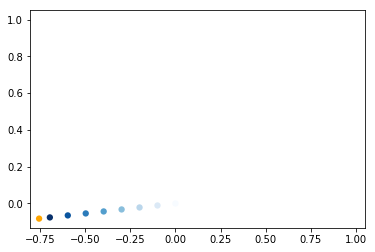

In [16]:
states, rewards = run_sim_episode(point_sim, near_optimal)
plot_state_history(states)

In [17]:
states

[{'dx': -0.7555455823504151, 'dy': -0.08222599653272078},
 {'dx': -0.6561325712857254, 'dy': -0.07140688237989484},
 {'dx': -0.5567195602210357, 'dy': -0.060587768227068906},
 {'dx': -0.45730654915634605, 'dy': -0.04976865407424297},
 {'dx': -0.35789353809165636, 'dy': -0.03894953992141703},
 {'dx': -0.25848052702696667, 'dy': -0.02813042576859104},
 {'dx': -0.15906751596227697, 'dy': -0.017311311615765046},
 {'dx': -0.059654504897587224, 'dy': -0.006492197462939109}]

In [18]:
rewards

[0.9999999999999996,
 0.9999999999999996,
 0.9999999999999984,
 0.9999999999999996,
 0.9999999999999996,
 0.9999999999999989,
 13]

# Next step: RL!

Now it's time to go write some inkling code to connect the simulator to a BRAIN. Then we'll train it.